# Air Quality Data Analysis Lab

## Objective
The objective of this lab is to analyze air quality data and generate a synthetic dataset that preserves the statistical characteristics of the original data.

## Dataset Description
The dataset contains hourly air quality measurements including SO2, NO2, O3, CO, PM10, and PM2.5.

## Methodology
- Loaded the real dataset using Pandas
- Generated a synthetic dataset of 1,000 samples
- Visualized data distributions using Seaborn
- Compared real and synthetic datasets

In [26]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load the Real Dataset
real_df = pd.read_csv( r"D:\AICourse\dataset\Measurement_summary.csv")
real_df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [28]:
# Select Air Quality Columns
air_cols = ["SO2", "NO2", "O3", "CO", "PM10", "PM2.5"]
real_df = real_df[air_cols]

real_df.describe()

,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [29]:
# Generate Synthetic Dataset (1,000 Samples)

np.random.seed(42)
synthetic_data={}

for col in air_cols:
    mean = real_df[col].mean()
    std = real_df[col].std()
    synthetic_data[col] = np.random.normal(mean,std,1000)

synthetic_df = pd.DataFrame(synthetic_data)
synthetic_df.head()

,SO2,NO2,O3,CO,PM10,PM2.5
0,0.037362,0.183658,-0.049072,-0.264073,-17.718589,6.798522
1,-0.012695,0.128993,0.003627,0.160467,41.488318,5.495963
2,0.049264,0.029385,-0.060715,0.341555,44.989724,-53.460905
3,0.118269,-0.051978,-0.012604,1.274312,77.329718,10.912916
4,-0.020254,0.102921,-0.170072,0.734778,-53.526619,57.601215


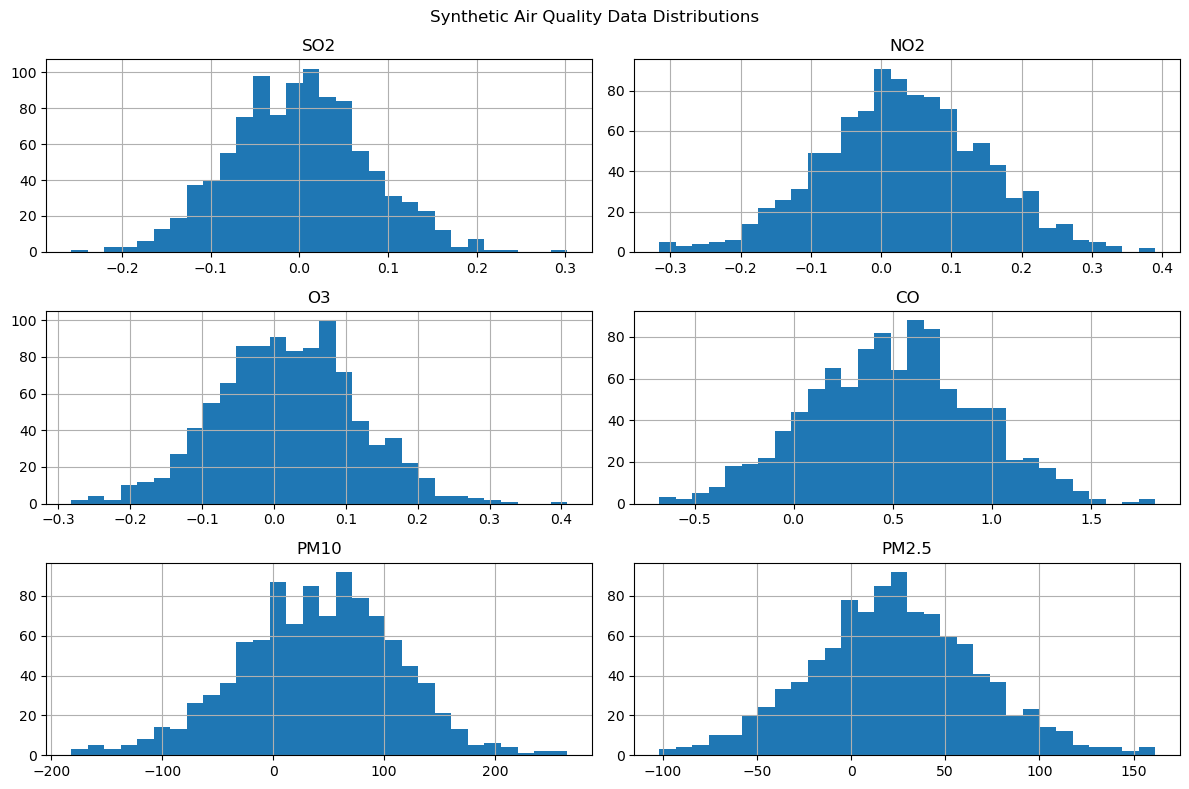

In [30]:
# Visualize Data Distributions
synthetic_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Synthetic Air Quality Data Distributions")
plt.tight_layout()
plt.show()

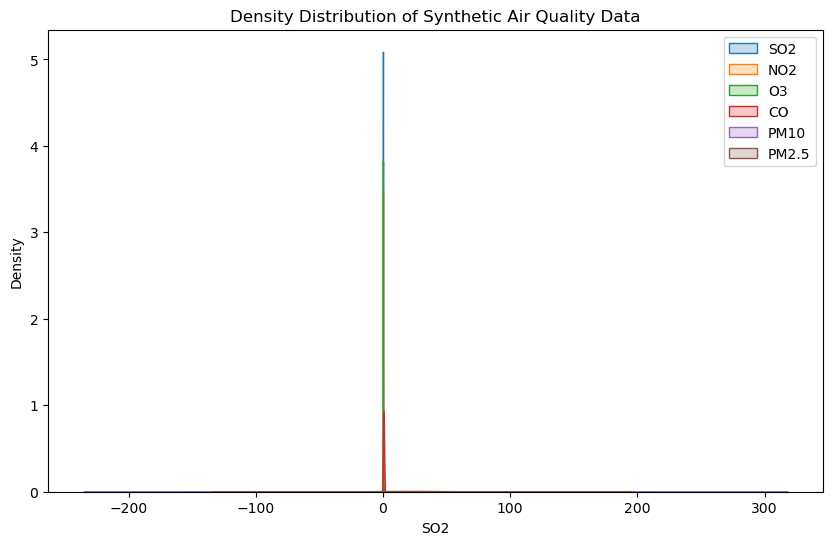

In [31]:

#KDE Plot (Synthetic Only)
plt.figure(figsize=(10, 6))

for col in air_cols:
    sns.kdeplot(synthetic_df[col], label=col, fill=True)

plt.title("Density Distribution of Synthetic Air Quality Data")
plt.legend()
plt.show()


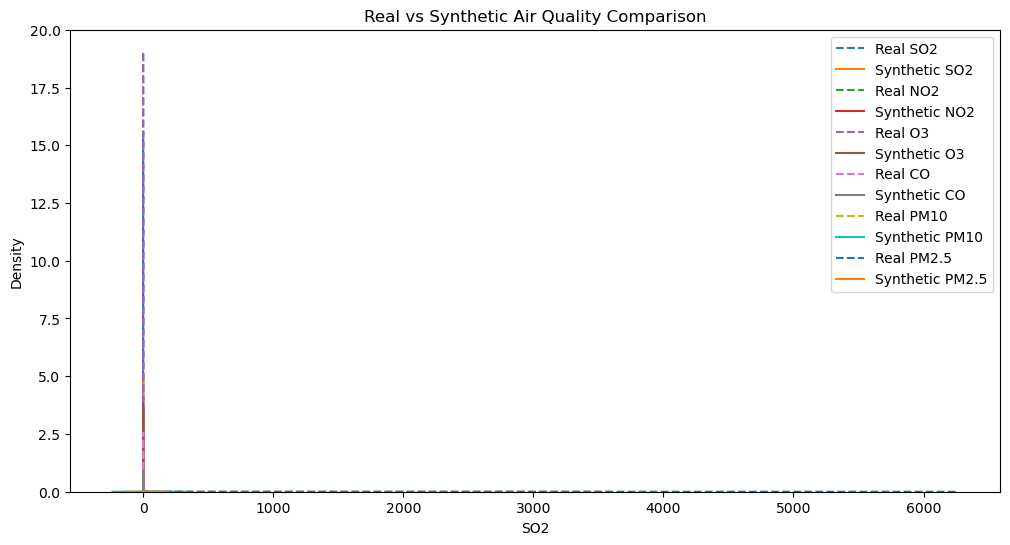

In [32]:
# Real vs Synthetic Comparison
plt.figure(figsize=(12, 6))

for col in air_cols:
    sns.kdeplot(real_df[col], label=f"Real {col}", linestyle="--")
    sns.kdeplot(synthetic_df[col], label=f"Synthetic {col}")

plt.title("Real vs Synthetic Air Quality Comparison")
plt.legend()
plt.show()


In [33]:
# Save Synthetic Dataset
synthetic_df.to_csv("synthetic_air_data.csv", index=False)
print("synthetic_air_data.csv saved successfully")


synthetic_air_data.csv saved successfully


In [34]:
# Statistical Comparison Table
comparison = pd.DataFrame({
    "Real Mean": real_df.mean(),
    "Synthetic Mean": synthetic_df.mean(),
    "Real Std": real_df.std(),
    "Synthetic Std": synthetic_df.std()
})

comparison


,Real Mean,Synthetic Mean,Real Std,Synthetic Std
SO2,-0.001795,-0.000271,0.078832,0.077194
NO2,0.022519,0.030676,0.115153,0.114860
O3,0.017979,0.018558,0.099308,0.097665
CO,0.509197,0.501610,0.405319,0.416316
PM10,43.708051,40.202856,71.137342,70.595291
PM2.5,25.411995,23.359064,43.924595,44.249165
